In [2]:
import pandas as pd
import seaborn as srn
import statistics as sts

In [3]:
# importando os dados
dataset = pd.read_csv('../dados/Churn.csv', sep=';')
# visualizando os dados
dataset.head() ## Em pyton, o head() entre outras funcoes sao metodos, e nao funcoes

,X0,X1,X2,X3,X4,X4.1,X6,X7,X8,X9,X10,X11
0,1,619,RS,Feminino,42,2,0,1,1,1,10134888.0,1
1,2,608,SC,Feminino,41,1,8380786,1,0,1,11254258.0,0
2,3,502,RS,Feminino,42,8,1596608,3,1,0,11393157.0,1
3,4,699,RS,Feminino,39,1,0,2,0,0,9382663.0,0
4,5,850,SC,Feminino,43,2,12551082,1,1,1,790841.0,0


In [7]:
dataset.shape
## retorna as dimensoes do dataset (linhas, colunas)

(999, 12)

In [4]:
## Como identificado, o dataSet nao possui nomes de colunas, entao vamos renomear
dataset.columns = ['Id', 'Score', 'Estado', 'Genero', 'Idade', 'Patrimonio', 'Saldo', 'Produtos', 'TemCartCredito', 'Ativo', 'Salario', 'Saiu']
dataset.head()

,Id,Score,Estado,Genero,Idade,Patrimonio,Saldo,Produtos,TemCartCredito,Ativo,Salario,Saiu
0,1,619,RS,Feminino,42,2,0,1,1,1,10134888.0,1
1,2,608,SC,Feminino,41,1,8380786,1,0,1,11254258.0,0
2,3,502,RS,Feminino,42,8,1596608,3,1,0,11393157.0,1
3,4,699,RS,Feminino,39,1,0,2,0,0,9382663.0,0
4,5,850,SC,Feminino,43,2,12551082,1,1,1,790841.0,0


<Axes: xlabel='Estado'>

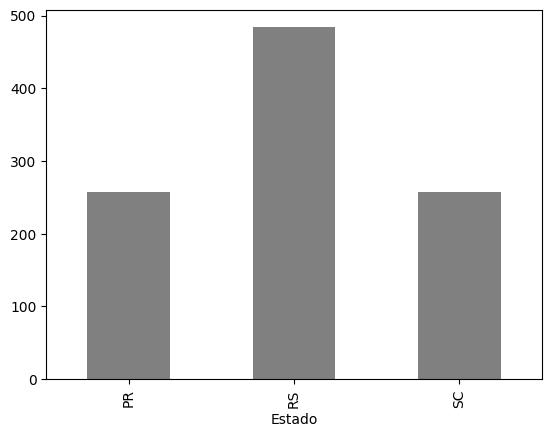

In [5]:
## Agora, faremos a exploracao dos dados categoricos
agrupado = dataset.groupby(['Estado']).size()   ## agrupando por estado

## com a identificaco de estados aparentemente incorretos, vamos corrigir
## substituindo os estados errados pela moda (regra usada para dados categoricos)
dataset.loc[dataset['Estado'].isin(['RP', 'SP', 'TD']), 'Estado'] = 'RS'
## funcao loc() permite localizar os dados que atendem a condicao passada
## isin() verifica se o valor esta contido na lista passada
## apos a condicao, passamos a coluna que queremos alterar e o valor que queremos atribuir
agrupado = dataset.groupby(['Estado']).size()
agrupado.plot.bar(color = 'gray')   

<Axes: xlabel='Genero'>

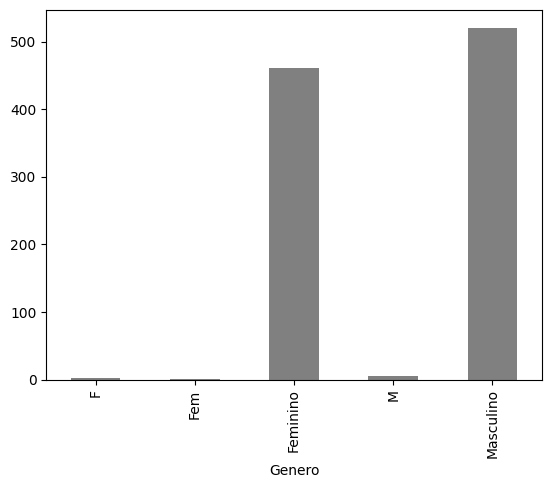

In [6]:
agrupado = dataset.groupby(['Genero']).size()
agrupado.plot.bar(color = 'gray') ## analisando variavel categoria genero
#Encontramos um erro de digitacao, vamos corrigir
dataset.loc[dataset['Genero'] == 'M', 'Genero'] = 'Masculino'
dataset.loc[dataset['Genero'].isin(['Fem', 'F']), 'Genero'] = 'Feminino'

agrupado.plot.bar(color = 'gray') ## Agora, a variavel genero esta corrigida com somente "Masculino" e "Feminino"

Text(0.5, 1.0, 'Score')

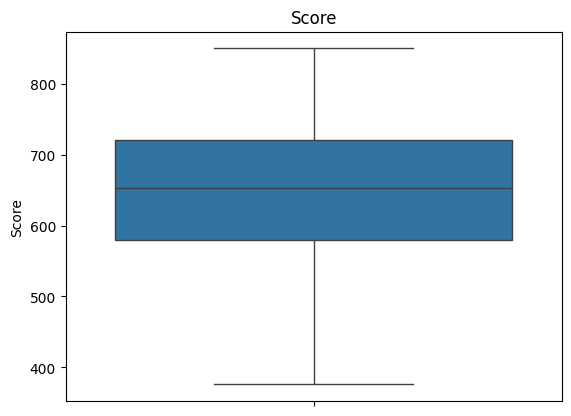

In [7]:
srn.boxplot(dataset['Score']).set_title('Score') ## analisando a variavel score

In [8]:
dataset.isnull().sum()
## Verificando se há valores nulos no dataset e somando-os

Id                0
Score             0
Estado            0
Genero            8
Idade             0
Patrimonio        0
Saldo             0
Produtos          0
TemCartCredito    0
Ativo             0
Salario           7
Saiu              0
dtype: int64

NESTE PONTO, PASSAMOS DA FASE DE "CONHECER/AJUSTAR" OS DADOS E PASSMAMOS A FAZER CORREÇÕES

In [10]:
median = sts.median(dataset['Salario'])
## Calculando a mediana da variavel salario
median

70518.0

In [ ]:
dataset['Salario'].fillna(median, inplace=True)
## fillna preence valores nulos com o valor passado
## inplace=True faz a alteracao no dataset original

dataset.isnull().sum()

In [ ]:
## no caso da variavel categorica, usaremos a moda para preencher por er alterações pontuais, porem, nao deve ser tratado como regra
moda = sts.mode(dataset['Genero']) ## calculando a moda com a lib statistics
dataset['Genero'].fillna(moda, inplace=True) ## preenchendo os valores nulos com a moda

In [17]:
dataset['Genero'].isnull().sum() ## verificando se ainda ha valores nulos

np.int64(0)

C:\Users\Rafael\AppData\Local\Temp\ipykernel_4736\982805432.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  srn.distplot(dataset['Idade']).set_title('Idade') ## analisando a variavel idade


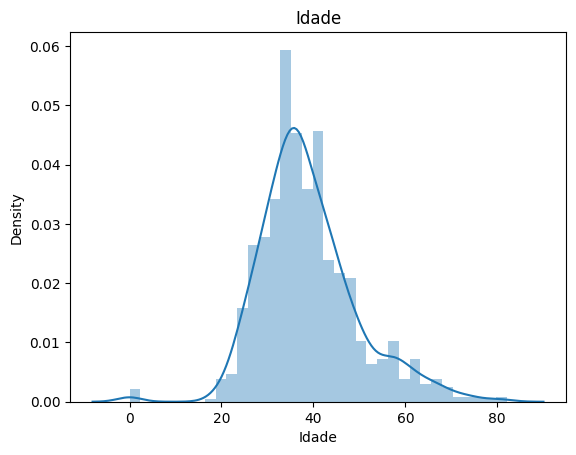

In [ ]:
## Tratando agora a caracteristica de idade

srn.distplot(dataset['Idade']).set_title('Idade') ## analisando a variavel idade
dataset.loc[(dataset['Idade'] < 0) | (dataset['Idade'] > 120)] = sts.median(dataset['Idade'])
## Utilizando o metodo loc() para filtrar valores fora do intervalo de 0 a 120
## e substituindo pela mediana

In [ ]:
dataset.duplicated().sum() ## Verificando se ha valores duplicados  
dataset.drop_duplicates(inplace=True, keep='first') ## Removendo valores duplicados

np.int64(0)

C:\Users\Rafael\AppData\Local\Temp\ipykernel_4736\2743415628.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  srn.distplot(dataset['Salario']).set_title('Salario')
C:\Users\Rafael\AppData\Local\Temp\ipykernel_4736\2743415628.py:11: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  srn.distplot(dataset['Salario']).set_titl

Text(0.5, 1.0, 'Salario')

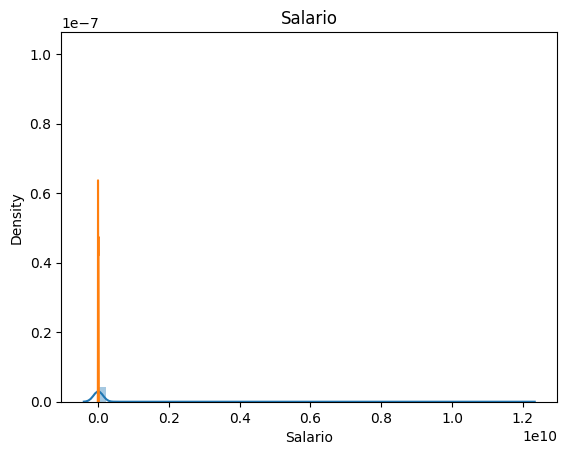

In [ ]:
## agora veremos a variavel de Salario
srn.distplot(dataset['Salario']).set_title('Salario')
## definiremos que salario acima de 2 desvios padrao da media sera considerado outlier
desv = sts.stdev(dataset['Salario'])
desv
## calculando o desvio padrao
dataset.loc[dataset['Salario'] >= 2 * desv]
## filtrando os valores que atendem a condicao
dataset = dataset.drop(dataset[dataset['Salario'] >= 2 * desv].index)
## removendo os valores filtrados